In [3]:
#importing the basic libraries
import pandas as pd
import numpy as np




In [4]:
#we import our data
betabank_df = pd.read_csv('https://bit.ly/2XZK7Bo')
betabank_df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
#checkingdata types
betabank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#checking our data for duplicates
betabank_df.duplicated().sum()

0

we note that we have no duplicates in our data thus we proceed to check and analyse our data further

In [7]:
#check for nulls
betabank_df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Tenure column has 909 nulls, we could either drop this records or replace with the mean, in this case we shall opt to replace the nulls with the mean, we need to get to see the shape of our data and confirm if dropping the data will have any impact or we could replace the nulls with the mean

In [8]:
betabank_df.shape

(10000, 14)

We have 10000 records thus dropping the 909 entries will mean we shall lose a significant portion of our data ie 0.09% rounded off to 1% thus in this case we shall replace the nulls with the mean

In [9]:
betabank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#replacing nulls with mean
betabank_df ['Tenure']= betabank_df['Tenure'].fillna(betabank_df['Tenure'].mean())


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
#One hot Encoding
betabank_df = pd.get_dummies(betabank_df, drop_first=True)


In [13]:
#features(x) and target(y)
features = betabank_df.drop(['Exited'],axis=1)
target =  betabank_df['Exited']
#spliting the data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.2, random_state=12345 )

In [14]:
#Training our model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model_lr = LogisticRegression(solver='liblinear', random_state=12345)

model_lr.fit(features_train,target_train)

prediction =model_lr.predict(features_train)

accuracy = model_lr.score(features_valid, target_valid)
from sklearn.metrics import roc_auc_score

print('Accuracy', accuracy)

print('f1 score:' ,f1_score(target_valid, model_lr.predict(features_valid)))


print('auc:', roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:,1]))

Accuracy 0.810625
f1 score: 0.0
auc: 0.5552569906181057


In [15]:
#Training our other models 

decision_tree= DecisionTreeClassifier(random_state=12345)
random_forest= RandomForestClassifier(random_state=12345,n_estimators=4)

decision_tree.fit(features_train,target_train)
random_forest.fit(features_train,target_train)

decision_tree_predict = decision_tree.predict(features_train)
random_forest_predict = random_forest.predict(features_train)


decision_tree_accuracy= decision_tree.score(features_valid, target_valid)
random_forest_accuracy = random_forest.score(features_valid, target_valid)


print('decision_tree_accuracy', decision_tree_accuracy)
print('random_forest_accuracy', random_forest_accuracy)

print('f1 decision_tree_score:' ,f1_score(target_valid, decision_tree.predict(features_valid)))
print('f1 random_forest_score:' ,f1_score(target_valid, random_forest.predict(features_valid)))

print('Decision_Tree_auc:', roc_auc_score(target_valid, decision_tree.predict_proba(features_valid)[:,1]))
print('Random_Forest_auc:', roc_auc_score(target_valid, random_forest.predict_proba(features_valid)[:,1]))

decision_tree_accuracy 0.81875
random_forest_accuracy 0.83
f1 decision_tree_score: 0.49477351916376305
f1 random_forest_score: 0.3732718894009217
Decision_Tree_auc: 0.6845932858513301
Random_Forest_auc: 0.7333984747742315


Random forest highest accuracy is at 0.83,thus a good model for our prediction 


In [16]:
#Checking the Data Imbalance
print(betabank_df[betabank_df['Exited'] == 0]['Exited'].count())
print(betabank_df[betabank_df['Exited'] == 1]['Exited'].count())

7963
2037


A notable issue on Data Imbalance. We shall need to come up with a way of correcting this either through Resampling (Undersampling and Oversampling):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


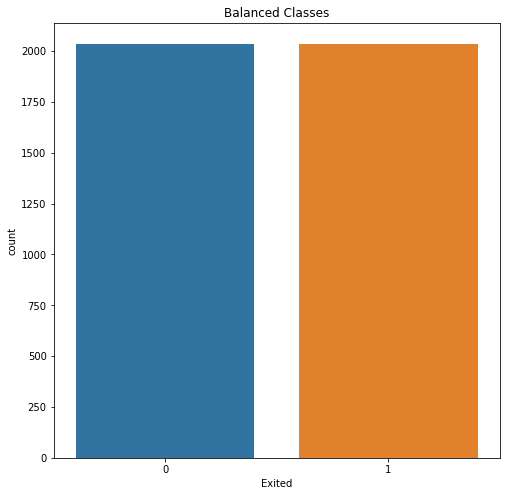

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#undersampling
# Shuffle the Dataset.
shuffled_df = betabank_df.sample(frac=1,random_state=4)

# Put all the common in one daataset.
common_df = shuffled_df.loc[shuffled_df['Exited'] == 1]

#Randomly select 7963 observations from the shuffled_df
uncommon_df = shuffled_df.loc[shuffled_df['Exited'] == 0].sample(n=2037,random_state=12345)

# Concatenate both dataframes again
normalized_df = pd.concat([common_df, uncommon_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Exited', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

After undersampling the dataset, we plot it again and it shows an equal number of classes: